In [1]:
import subprocess

# Launch Flask server (app.py) in a new terminal or command prompt
subprocess.Popen(['python', 'app.py'])


<Popen: returncode: None args: ['python', 'app.py']>

In [2]:
from flask import Flask, render_template

# Define the Flask app without running it immediately
app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')


@app.route('/abc1.html')
def page1():
    return render_template('abc1.html')

@app.route('/abc2.html')
def page2():
    return render_template('abc2.html')

@app.route('/abc3.html')
def page3():
    return render_template('abc3.html')

@app.route('/abc4.html')
def page4():
    return render_template('abc4.html')

@app.route('/abc.html')
def page0():
    return render_template('abc.html')

@app.route('/abc5.html')
def page5():
    return render_template('abc5.html')

@app.route('/abc6.html')
def page6():
    return render_template('abc6.html')

@app.route('/combined_maps.html')
def page7():
    return render_template('combined_maps.html')



In [3]:
import cv2
import numpy as np
from IPython.display import display, HTML
from IPython.display import Video

def dark_channel(image, window_size=15):
    min_channel = np.min(image, axis=2)
    return cv2.erode(min_channel, np.ones((window_size, window_size)))

def estimate_atmosphere(image, dark_channel, percentile=0.001):
    flat_dark_channel = dark_channel.flatten()
    flat_image = image.reshape(-1, 3)
    num_pixels = flat_image.shape[0]
    num_pixels_to_keep = int(num_pixels * percentile)
    indices = np.argpartition(flat_dark_channel, -num_pixels_to_keep)[-num_pixels_to_keep:]
    atmosphere = np.max(flat_image[indices], axis=0)
    return atmosphere

def dehaze(image, tmin=0.1, omega=0.95, window_size=15):
    if image is None:
        return None

    image = image.astype(np.float64) / 255.0
    dark_ch = dark_channel(image, window_size)
    atmosphere = estimate_atmosphere(image, dark_ch)
    transmission = 1 - omega * dark_ch

    transmission = np.maximum(transmission, tmin)
    dehazed = np.zeros_like(image)
    for channel in range(3):
        dehazed[:, :, channel] = (image[:, :, channel] - atmosphere[channel]) / transmission + atmosphere[channel]

    dehazed = np.clip(dehazed, 0, 1)

    return (dehazed * 255).astype(np.uint8)

# Path to the video file
video_path = "original.mp4"

# Create a VideoCapture object
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / fps

# Set the desired number of frames
target_frames = int(duration)

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video_path = "output777.mp4"
frame_width = 2720
frame_height = 1530
output_video = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Loop through each frame, apply desmoking, and write to the output video
frame_count = 0
while frame_count < target_frames:
    success, frame = cap.read()
    if not success:
        break

    # Apply desmoking to the frame
    dehazed_frame = dehaze(frame)

    # Write the dehazed frame to the output video
    output_video.write(dehazed_frame)

    frame_count += 1

# Release the video capture and video writer objects
cap.release()
output_video.release()
# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'h264')  # or 'mp4v'
output_video = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))


# Display the dehazed video directly in the notebook
video_path_display = "output777.mp4"
video_html = """
<video width="720" height="530" controls>
  <source src="{}" type="video/mp4">
  Your browser does not support the video tag.
</video>
""".format(video_path_display)

display(HTML(video_html))


KeyboardInterrupt: 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage, TextArea
import os

class Maze:
    def __init__(self, maze, start_position, goal_positions):
        self.maze = maze
        self.maze_height = maze.shape[0]
        self.maze_width = maze.shape[1]
        self.start_position = start_position
        self.goal_positions = goal_positions
        self.text_annotations = []




    def show_maze(self, show_annotations=True, save_path=None):
        plt.figure(figsize=(5, 5))
        plt.imshow(self.maze, cmap='gray')

        plt.text(self.start_position[0], self.start_position[1], 'Man', ha='center', va='center', color='red', fontsize=20)
        for goal_position in self.goal_positions:
            plt.text(goal_position[0], goal_position[1], 'Exit', ha='center', va='center', color='green', fontsize=20)

        if show_annotations:
            # Add text annotations directly
            plt.text(0.5, 1, "Room 1", ha='center', va='center', color='black', fontsize=14)
            plt.text(5, 2, "Dining", ha='center', va='center', color='black', fontsize=14)
            plt.text(0.5, 4.5, "Bath", ha='center', va='center', color='black', fontsize=14)
            plt.text(0.5, 6, "Drawing", ha='center', va='center', color='black', fontsize=14)
            plt.text(5.5, 6, "Bath", ha='center', va='center', color='black', fontsize=14)
            plt.text(0.5, 7, "Varanda", ha='center', va='center', color='black', fontsize=14)

            for annotation in self.text_annotations:
                plt.gca().add_artist(annotation)

        plt.xticks([]), plt.yticks([])

        if save_path:
            plt.savefig(save_path, bbox_inches='tight')

        plt.show()




    def update_cell(self, x, y, value):
        if 0 <= x < self.maze_width and 0 <= y < self.maze_height:
            self.maze[y][x] = value
            print(f"Updated maze at ({x}, {y}) to {value}")
        else:
            print(f"Invalid coordinates: ({x}, {y})")



    def clear_text_annotations(self):
        self.text_annotations = []

# Continue with the rest of your code...
     

True

In [ ]:
print("This code block has been run and the Maze class is now available for use.")
maze_layout = np.array([
    [1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 1, 1, 1, 1, 1],
    [0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 1, 1, 1, 1, 1],
])

start_position = (1, 3)
goal_positions = [(7, 5), (2, 7)]  # Example with two exit points

# Create an instance of the maze
maze = Maze(maze_layout, start_position, goal_positions)

# Update a cell in the maze
maze.update_cell(2, 6, 1)

# Show the maze with added text


# Example usage of placing text in the maze
# Example usage of placing text in the maze
maze.show_maze(save_path=r'static/block.png')


#
actions = [(-1, 0),  
           (1, 0),   
           (0, -1), 
           (0, 1)]   







In [ ]:
class QLearningAgent:
    def __init__(self, maze, learning_rate=0.1, discount_factor=0.9, exploration_start=1.0, exploration_end=0.01,
                 num_episodes=100):
        # Initialize the Q-learning agent with a Q-table containing all zeros
        # where the rows represent states, columns represent actions, and the third dimension is for each action (Up, Down, Left, Right)
        self.q_table = np.zeros((maze.maze_height, maze.maze_width, 4))  # 4 actions: Up, Down, Left, Right
        self.learning_rate = learning_rate  # Learning rate controls how much the agent updates its Q-values after each action
        self.discount_factor = discount_factor  # Discount factor determines the importance of future rewards in the agent's decisions
        self.exploration_start = exploration_start  # Exploration rate determines the likelihood of the agent taking a random action
        self.exploration_end = exploration_end
        self.num_episodes = num_episodes

    def get_exploration_rate(self, current_episode):
        # Calculate the current exploration rate using the given formula
        exploration_rate = self.exploration_start * (
                self.exploration_end / self.exploration_start) ** (current_episode / self.num_episodes)
        return exploration_rate

    def get_action(self, state, current_episode):
        exploration_rate = self.get_exploration_rate(current_episode)
        # Select an action for the given state either randomly (exploration) or using the Q-table (exploitation)
        if np.random.rand() < exploration_rate:
            return np.random.randint(4)  # Choose a random action (index 0 to 3, representing Up, Down, Left, Right)
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, next_state, reward):
        # Find the best next action by selecting the action that maximizes the Q-value for the next state
        best_next_action = np.argmax(self.q_table[next_state])

        # Get the current Q-value for the current state and action
        current_q_value = self.q_table[state][action]

        # Q-value update using Q-learning formula
        new_q_value = current_q_value + self.learning_rate * (
                reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)

        # Update the Q-table with the new Q-value for the current state and action
        self.q_table[state][action] = new_q_value


print("This code block has been run, and the QLearningAgent class is now available for use.")

goal_reward = 100
wall_penalty = -10
step_penalty = -1

print("The reward system has been defined.")

# This function simulates the agent's movements in the maze for a single episode.


In [ ]:
def finish_episode(agent, maze, current_episode, train=True):
    # Initialize the agent's current state to the maze's start position
    current_state = maze.start_position
    is_done = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]

    # Continue until the episode is done
    while not is_done:
        # Get the agent's action for the current state using its Q-table
        action = agent.get_action(current_state, current_episode)

        # Compute the next state based on the chosen action
        next_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])

        # Check if the next state is out of bounds or hitting a wall
        if next_state[0] < 0 or next_state[0] >= maze.maze_height or next_state[1] < 0 or next_state[1] >= maze.maze_width or \
                maze.maze[next_state[1]][next_state[0]] == 1:
            reward = wall_penalty
            next_state = current_state
        # Check if the agent reached any of the goals
        elif next_state in maze.goal_positions:
            path.append(next_state)
            reward = goal_reward
            is_done = True
        # The agent takes a step but hasn't reached the goal yet
        else:
            path.append(next_state)
            reward = step_penalty

        # Update the cumulative reward and step count for the episode
        episode_reward += reward
        episode_step += 1

        # Update the agent's Q-table if training is enabled
        if train:
            agent.update_q_table(current_state, action, next_state, reward)

        # Move to the next state for the next iteration
        current_state = next_state

    # Return the cumulative episode reward, total number of steps, and the agent's path during the simulation
    return episode_reward, episode_step, path


In [ ]:
def test_agent(agent, maze, num_episodes=1):
    # Simulate the agent's behavior in the maze for the specified number of episodes
    episode_reward, episode_step, path = finish_episode(agent, maze, num_episodes, train=False)

    # Print the learned path of the agent
    print("Learned Path:")
    for position in path:
        print(f"({position[0]}, {position[1]}) -> ", end='')
    print("Goal!")

    print("Number of steps:", episode_step)
    print("Total reward:", episode_reward)

    # Clear the existing plot if any
    if plt.gcf().get_axes():
        plt.cla()

    # Visualize the maze using matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(maze.maze, cmap='gray')

    # Mark the start position (red 'S') and goal positions (green 'G') in the maze
    plt.text(maze.start_position[0], maze.start_position[1], 'Man', ha='center', va='center', color='red', fontsize=20)
    for goal_position in maze.goal_positions:
        plt.text(goal_position[0], goal_position[1], 'Exit', ha='center', va='center', color='green', fontsize=20)

    # Mark the agent's path with blue 'X' symbols
    for position in path:
        plt.text(position[0], position[1], "*", va='center', color='blue', fontsize=20)

    # Add text annotations
    plt.text(0.5, 1, "Room 1", ha='center', va='center', color='black', fontsize=14)
    plt.text(5, 2, "Dining", ha='center', va='center', color='black', fontsize=14)
    plt.text(0.5, 4.5, "Bath", ha='center', va='center', color='black', fontsize=14)
    plt.text(0.5, 6, "Drawing", ha='center', va='center', color='black', fontsize=14)
    plt.text(5.5, 6, "Bath", ha='center', va='center', color='black', fontsize=14)
    plt.text(0.5, 7, "Varanda", ha='center', va='center', color='black', fontsize=14)

    # Remove axis ticks and grid lines for a cleaner visualization
    plt.xticks([]), plt.yticks([])
    plt.grid(color='black', linewidth=2)

    # Save the figure as an image file
    plt.savefig('escape_route.png')

    # Display the plot
    plt.show()

    return episode_step, episode_reward



agent = QLearningAgent(maze)
# Test the agent using the test_agent function
test_agent(agent, maze)

def train_agent(agent, maze, num_episodes=100):
    # Lists to store the data for plotting
    episode_rewards = []
    episode_steps = []

    # Loop over the specified number of episodes
    for episode in range(num_episodes):
        episode_reward, episode_step, path = finish_episode(agent, maze, episode, train=True)

        # Store the episode's cumulative reward and the number of steps taken in their respective lists
        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)

    # Plotting the data after training is completed
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Reward per Episode')

    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"The average reward is: {average_reward}")

    plt.subplot(1, 2, 2)
    plt.plot(episode_steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps Taken')
    plt.ylim(0, 100)
    plt.title('Steps per Episode')

    average_steps = sum(episode_steps) / len(episode_steps)
    print(f"The average steps are: {average_steps}")

    plt.tight_layout()
    plt.show()


print("This code block has been run, and the train_agent function is now available for use.")

# Training the agent
train_agent(agent, maze, num_episodes=100)

# Testing the agent after training
test_agent(agent, maze, num_episodes=100)


In [4]:
import cv2
import numpy as np 
import time
import pygame
import smtplib
import matplotlib.pyplot as plt
import webbrowser

url = 'http://127.0.0.1:5000'

# Open the webpage in the default web browser



# Load yolo
def load_yolo():
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    classes = []
    with open("obj.names", "r") as f:
        classes = [line.strip() for line in f.readlines()]

    layer_names = net.getUnconnectedOutLayersNames()
    colors = np.random.uniform(0, 255, size=(len(classes), 3))
    return net, classes, colors, layer_names

# Load image
def load_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape
    return img, height, width, channels

def start_webcam():
    cap = cv2.VideoCapture(0)
    return cap

def send_email():
    try:
        server = smtplib.SMTP_SSL("smtp.zoho.com", 465)
        server.login("adxthyx@zohomail.in", "AbYz1803")
        server.sendmail("adxthyx@zohomail.in", "adithyanarayana02@gmail.com", "Fire detected in your building")
        server.quit()
        print("Email sent successfully.")
    except Exception as e:
        print(f"Error sending email: {e}")

def play_alarm_sound_function():
    pygame.mixer.init()
    pygame.mixer.music.load('alarm-sound.mp3')
    pygame.mixer.music.play()

def detect_objects(img, net, outputLayers):            
    blob = cv2.dnn.blobFromImage(img, scalefactor=0.00392, size=(320, 320), mean=(0, 0, 0), swapRB=True, crop=False)
    net.setInput(blob)
    outputs = net.forward(outputLayers)
    return blob, outputs

def get_box_dimensions(outputs, height, width):
    boxes = []
    confs = []
    class_ids = []
    for output in outputs:
        for detect in output:
            scores = detect[5:]
            class_id = np.argmax(scores)
            conf = scores[class_id]
            if conf > 0.3:
                center_x = int(detect[0] * width)
                center_y = int(detect[1] * height)
                w = int(detect[2] * width)
                h = int(detect[3] * height)
                x = int(center_x - w/2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confs.append(float(conf))
                class_ids.append(class_id)
    return boxes, confs, class_ids

def draw_labels(boxes, confs, colors, class_ids, classes, img): 
    fire_detected = False
    indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[i]
            confidence = confs[i]

            if label.lower() == 'fire' and confidence > 0.996:
                fire_detected = True

            cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
            cv2.putText(img, label, (x, y - 5), font, 1, color, 1)

    img = cv2.resize(img, (800, 600))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    if fire_detected:
        print("Fire detected")
        play_alarm_sound_function()
        if __name__ == '__main__':
            webbrowser.open(url)
            app.run()

        #send_email()

    return fire_detected

def image_detect(img_path): 
    model, classes, colors, output_layers = load_yolo()
    image, height, width, channels = load_image(img_path)
    blob, outputs = detect_objects(image, model, output_layers)
    boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
    draw_labels(boxes, confs, colors, class_ids, classes, image)



# Example for image detection



pygame 2.5.2 (SDL 2.28.3, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
def webcam_detect():
    model, classes, colors, output_layers = load_yolo()
    cap = start_webcam()
    while True:
        _, frame = cap.read()
        height, width, channels = frame.shape
        blob, outputs = detect_objects(frame, model, output_layers)
        boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
        draw_labels(boxes, confs, colors, class_ids, classes, frame)
        key = cv2.waitKey(1)
        if key == 27:
            break
    cap.release()

In [6]:
def start_video(video_path):
    model, classes, colors, output_layers = load_yolo()
    cap = cv2.VideoCapture(video_path)
    while True:
        _, frame = cap.read()
        height, width, channels = frame.shape
        blob, outputs = detect_objects(frame, model, output_layers)
        boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
        draw_labels(boxes, confs, colors, class_ids, classes, frame)
        key = cv2.waitKey(1)
        if key ==ord('q'):
            break
    cap.release()

In [7]:
def start_video(video_path):
    model, classes, colors, output_layers = load_yolo()
    cap = cv2.VideoCapture(video_path)
    while True:
        _, frame = cap.read()
        height, width, channels = frame.shape
        blob, outputs = detect_objects(frame, model, output_layers)
        boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
        draw_labels(boxes, confs, colors, class_ids, classes, frame)
        key = cv2.waitKey(1)
        if key ==ord('q'):
            break
    cap.release()

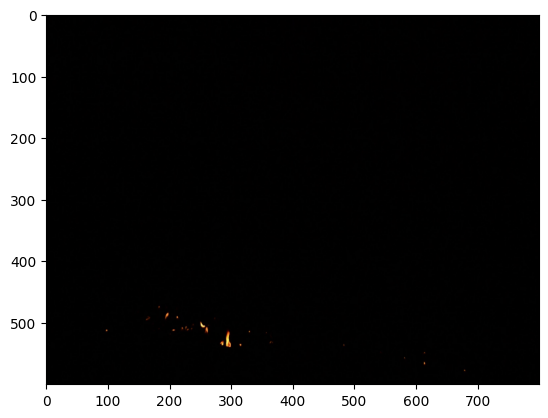

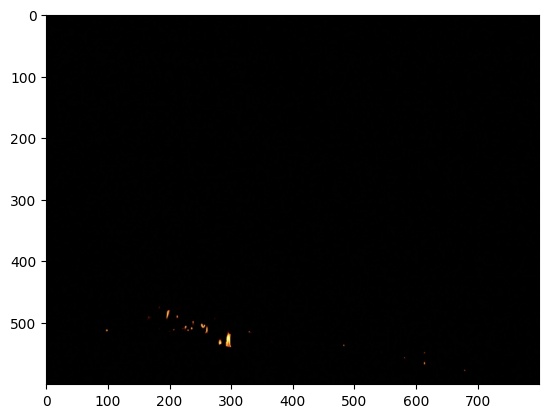

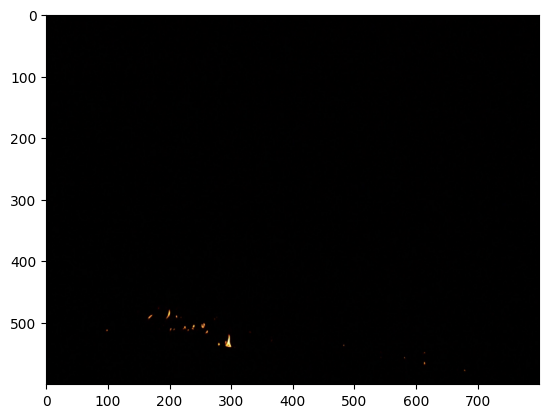

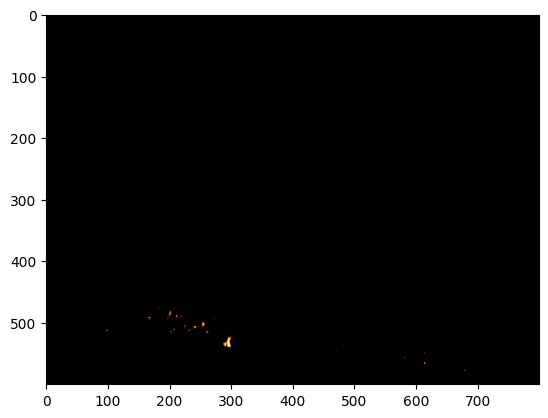

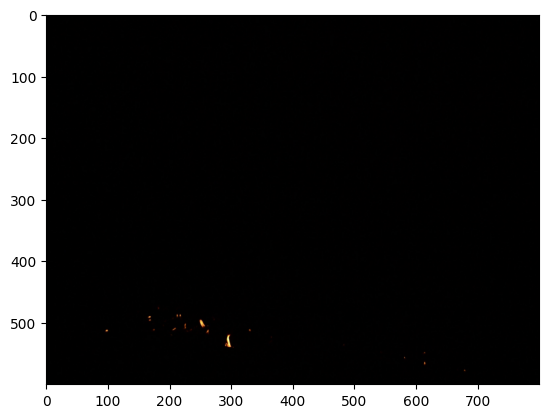

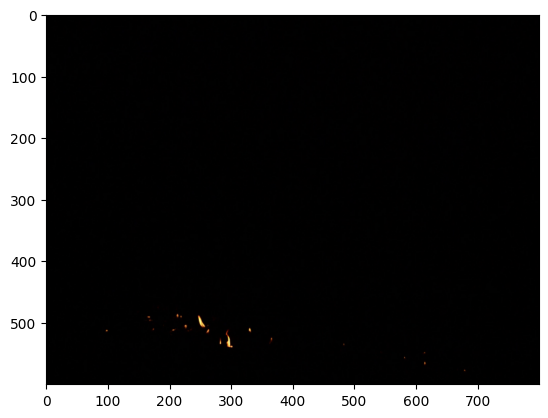

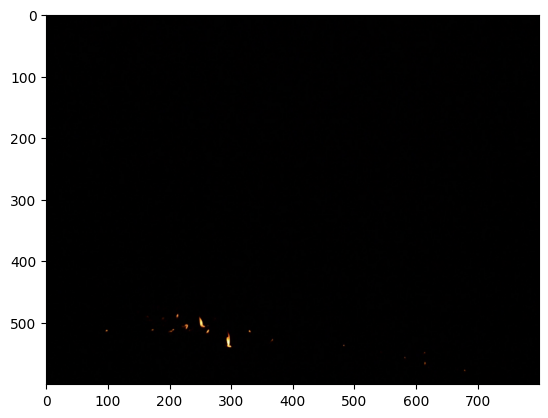

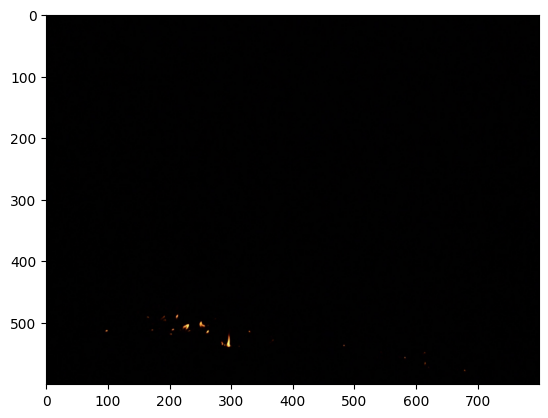

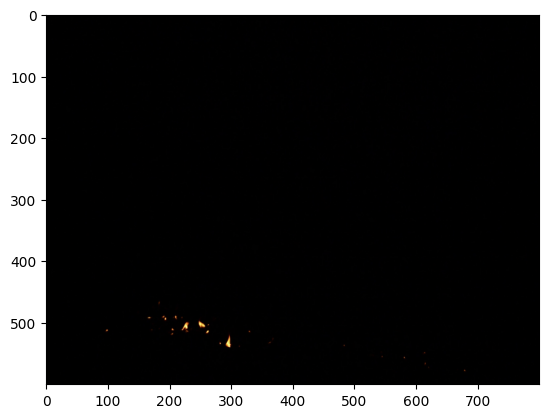

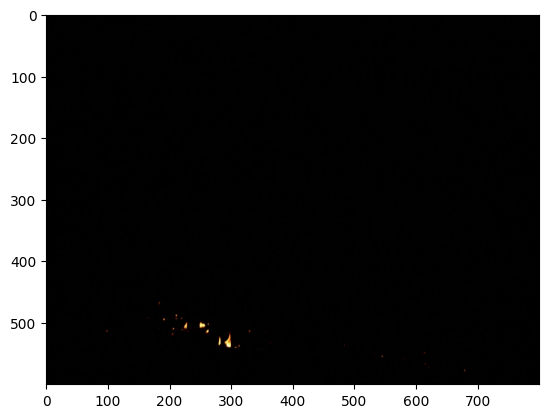

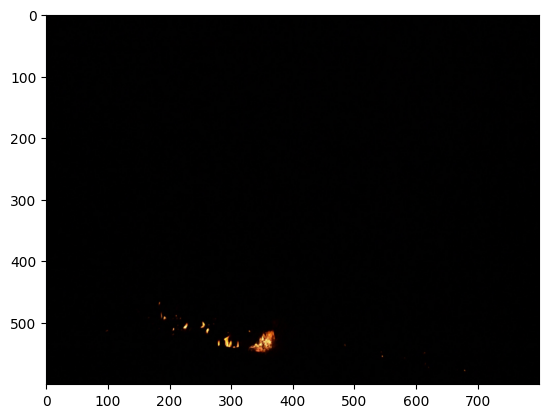

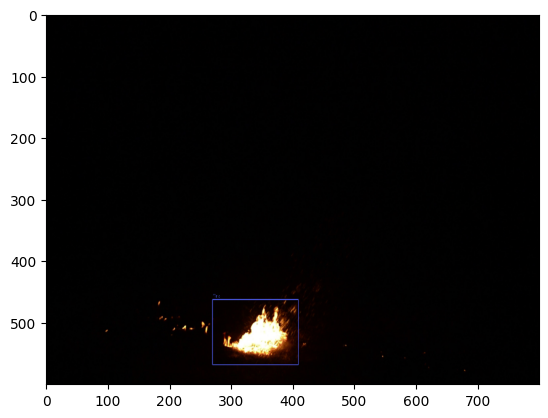

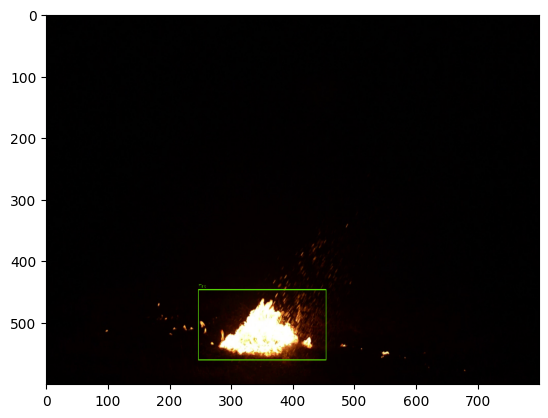

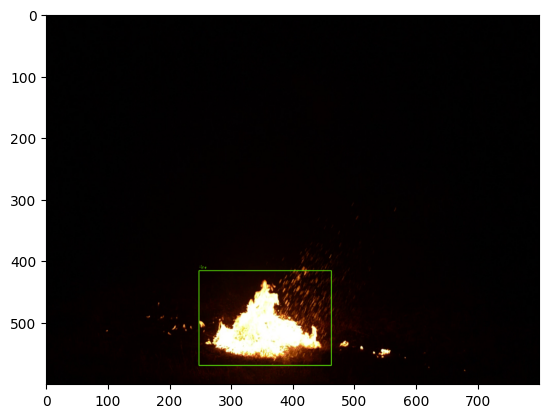

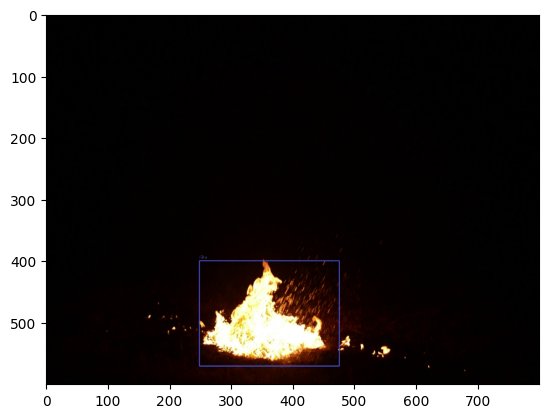

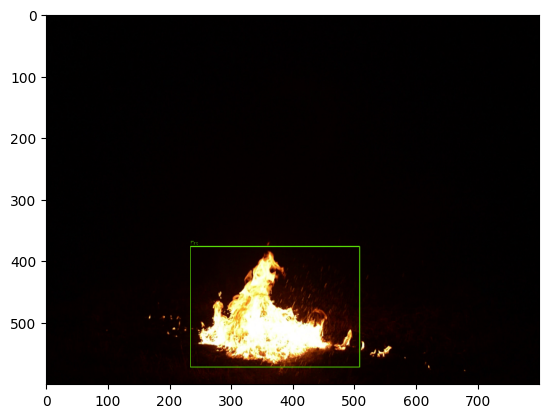

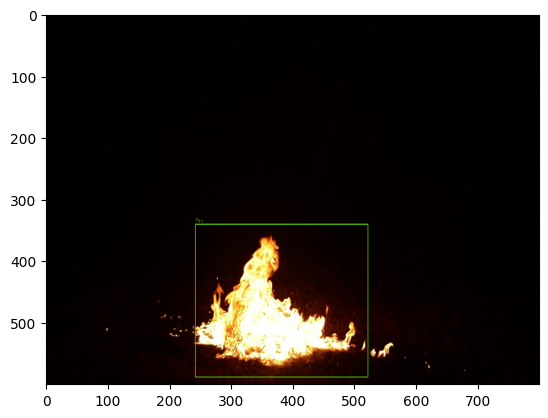

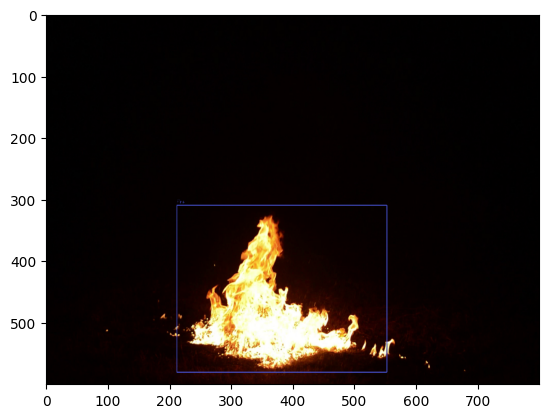

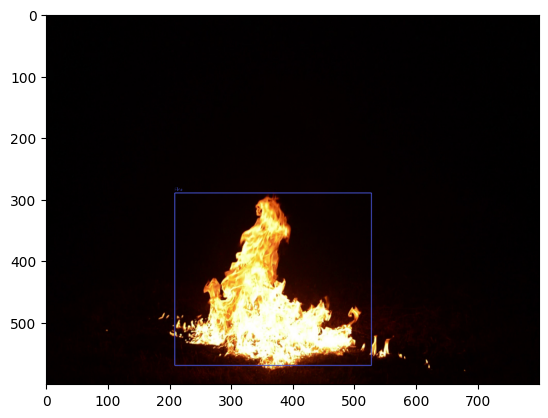

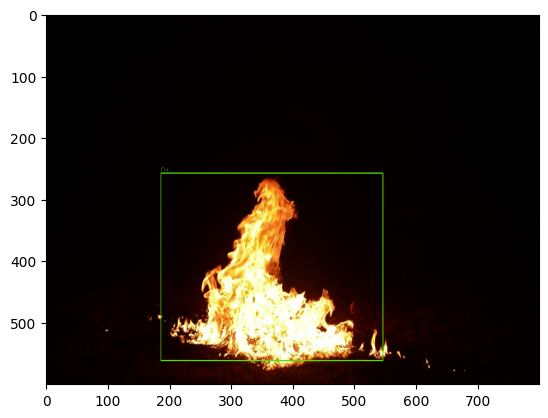

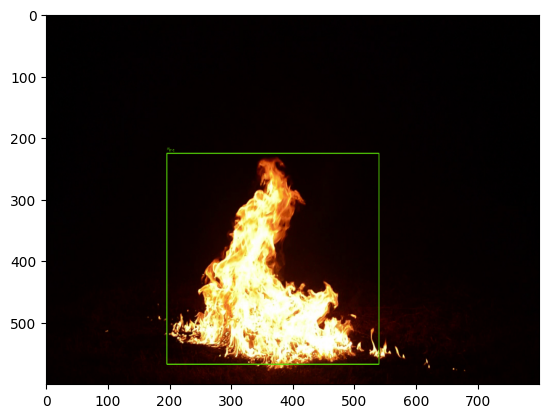

Fire detected
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [8]:
start_video("abc.mp4")